# Create the money plot of HR vs estimated Age


In [27]:
import pandas as pd
from glob import glob
import datetime

In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
from scipy.stats import spearmanr

In [38]:
dataset = 'campbell'   # 'gupta' or 'campbell' or 'campbellG'

## Import HR

In [39]:
if dataset in ['campbell', 'campbellG']:
    SNData = pd.read_csv('../data/CampbellHoltzman.tsv', sep='\t', usecols=['SNID', 'hr', 'err_mu'], index_col='SNID')
    # SNData = pd.read_csv('../data/circlePhotometry-hr-del.tsv', sep='\t', usecols=['cid', 'hr'], index_col='cid')
    # SNData = SNData['']
    # SNData.describe()
    SNData.rename(columns={'err_mu': 'hr uncert'}, inplace=True)
if dataset == 'gupta':
    SNData = pd.read_csv('../data/Gupta11_table2.tsv', sep='\t', skiprows=2, usecols=['x_1 uncert', 'HR'])#, index_col='SN ID')
    SNData.rename(columns={'x_1 uncert': 'hr', 'HR': 'hr uncert' }, inplace=True) # 'cause read_csv is shifting the headers over by one?
print(len(SNData))
SNData.head(5)

306


,hr uncert,hr
SNID,,
10028,0.090201,-0.212562
1032,0.124407,-0.160149
10324,0.151389,-0.331532
10550,0.223295,0.187469
10559,0.177469,0.039114


## Import Ages

## sample the probability dists so there is 4000 "points" not 100 million

In [40]:
# number of samples desired
num = 50

In [41]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = SNData.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,hr uncert,hr,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
SNID,,,,,,,,,,,,,,,,,,,,,
10028,0.090201,-0.212562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,0.124407,-0.160149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10324,0.151389,-0.331532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10550,0.223295,0.187469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10559,0.177469,0.039114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,0.103240,-0.124423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11172,0.103244,0.236458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,0.218702,0.244715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11311,0.170324,-0.299080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTICE:**

**THIS WILL TAKES A VERY LONG TIME**


In [43]:
if dataset == 'gupta':
    files = '../resources/SN{}_gupta_chain.tsv'
if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

test.head(5)

,hr uncert,hr,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
SNID,,,,,,,,,,,,,,,,,,,,,
10028,0.090201,-0.212562,6.559619,6.453226,5.736747,7.390752,5.882839,6.565840,5.971480,5.613576,...,6.411681,5.603533,6.853762,6.423901,6.138986,6.120722,4.860112,5.250743,4.978436,5.156076
1032,0.124407,-0.160149,6.100638,6.106305,7.138990,0.761765,9.862074,4.705908,4.047330,1.330482,...,9.153019,6.054402,0.645136,7.280072,9.257459,6.568430,5.243817,1.611494,7.808539,7.815980
10324,0.151389,-0.331532,5.097010,3.755446,2.136754,4.757335,4.443138,3.924267,1.635833,3.165391,...,4.329586,2.038398,1.766794,2.287896,0.851040,1.004655,1.437113,2.222026,3.007239,1.451991
10550,0.223295,0.187469,2.486906,3.019544,2.417145,2.179631,1.185331,2.702372,2.559110,2.517003,...,3.744760,3.285098,2.805127,2.380072,3.850736,3.416580,2.112806,3.769607,4.811052,3.224763
10559,0.177469,0.039114,2.573241,6.670919,0.508357,5.815140,3.946389,5.176523,5.032704,5.756148,...,7.665286,1.715459,4.682443,7.537033,7.966761,8.517479,5.171448,6.197496,6.838033,7.803644


## Get scatter points for background 

This may need to be a 2d-histogram in the future if I use meshgrid

In [35]:
# make sure you add the dtype, or else the regression plots do not work
plot = pd.DataFrame(columns=['hr', 'age'], dtype=np.float64)
plot.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        plot.loc[index*num+num_, ['hr', 'age']] = [test.iloc[index]['hr']+(test.iloc[index]['hr uncert']/3)*np.random.randn(1)[0],
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

plot.head(5)

,hr,age
0,-0.224835,8.869685
1,-0.198922,7.069153
2,-0.171117,7.220231
3,-0.207989,6.405188
4,-0.185409,6.470857


# make the plot

In [36]:
# Set plot configurations

## ylim changes
if dataset == 'gupta':
    ylim = (-0.5, 0.5)
else:
    ylim = (-0.75, 0.75)

## global v local labels
if dataset in ['gupta', 'campbellG']:
    xlabel = 'global age [Gyr]'
else:
    xlabel = 'local age [Gyr]'
    
    
## Savefig
if dataset == 'gupta':
    savename = f'GlobalHRvAge{uuid}.pdf'
elif dataset == 'campbellG':
    savename = f'campbellG-HRvAge{uuid}.pdf'
elif dataset == 'campbell':
    savename = f'LocalHRvAge{uuid}.pdf'
else:
    savename = f'HRvAge{uuid}.pdf'

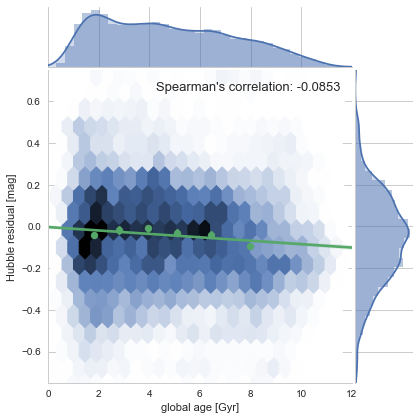

In [37]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(0,12),  ylim=ylim, #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}
                               })

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.4f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
# g.savefig('campbellG-HRvAge.pdf')
plt.show()

## Other plots

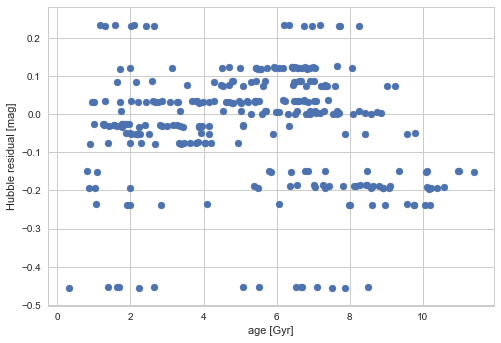

In [318]:
plt.scatter(plot['age'], plot['hr'])
plt.xlabel('age [Gyr]')
plt.ylabel('Hubble residual [mag]')
plt.show()

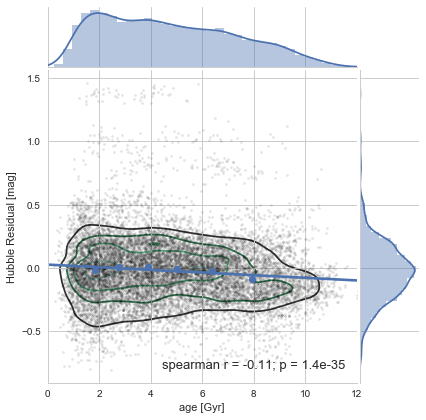

In [22]:
fig = plt.figure('seaborn regression')
# We could do a bunch of this in one line, or I can split it up and comment it out.
# https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid
# set figure with pandas data
g = sns.JointGrid(x='age', y='hr', data=plot, space=0.05, xlim=(0,12))
# create center plot with multiple layers
g = g.plot_joint(plt.scatter, s=5, alpha=0.1, color='k')
g = g.plot_joint(sns.regplot, x_bins=6, #marker='.', 
                 ci=68)#, 
#                  scatter_kws=dict(alpha=0.5))
# g = g.plot_joint(plt.hexbin)
g = g.plot_joint(sns.kdeplot, zorder=0, n_levels=4)
# create marginal plots
g = g.plot_marginals(sns.distplot, kde=True)#, color=".5")
#  _ = g.ax_marg_x.hist(tips["total_bill"], color="b", alpha=.6,
#                       bins=np.arange(0, 60, 5))
# _ = g.ax_marg_y.hist(tips["tip"], color="r", alpha=.6,
#                      orientation="horizontal",
#                      bins=np.arange(0, 12, 1))
# update figure annotations
g = g.annotate(spearmanr, #template="{stat}: {val:.2f}",
                stat="spearman r", loc="lower right", fontsize=13)
g = g.set_axis_labels('age [Gyr]', 'Hubble Residual [mag]')
# oneline/high level alternative
# https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
# g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex",
#               marginal_kws=dict(kde=True),# rug=True),
#               annot_kws=dict(stat="spearman r"),
# #               s=5, alpha=0.7
#              ).plot_joint(sns.kdeplot, zorder=0, n_levels=4)
plt.show()
# g.savefig('GlobalHRvAge.pdf')


# sns.lmplot
# sns.jointplot("age", "hr", data=plot, kind="reg")
# sns.regplot(x="age", y="hr", data=plot)
# sns.lmplot(x='age', y='hr', data=plot)